In [7]:
#import modules
import random
random.seed(10)
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./listings.csv', low_memory=False)

In [9]:
#EDA
df.shape

(51097, 106)

In [10]:
#Look at first 50 rows of data
df.head(50)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200212052319,2020-02-12,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20200212052319,2020-02-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.69
2,5099,https://www.airbnb.com/rooms/5099,20200212052319,2020-02-12,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.59
3,5121,https://www.airbnb.com/rooms/5121,20200212052319,2020-02-12,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38
4,5178,https://www.airbnb.com/rooms/5178,20200212052319,2020-02-13,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,none,"Theater district, many restaurants around here.",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.53
5,5203,https://www.airbnb.com/rooms/5203,20200212052319,2020-02-12,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,...,f,f,flexible,t,t,1,0,1,0,0.93
6,5238,https://www.airbnb.com/rooms/5238,20200212052319,2020-02-12,Cute & Cozy Lower East Side 1 bdrm,"Live like a New Yorker instead of a stuffy, ti...",PLEASE NOTE: do not automatically book with ou...,"Live like a New Yorker instead of a stuffy, ti...",none,"Historically, the Lower East Side was a stoppi...",...,f,f,strict_14_with_grace_period,f,f,4,2,0,2,1.27
7,5441,https://www.airbnb.com/rooms/5441,20200212052319,2020-02-12,Central Manhattan/near Broadway,Convenient Midtown Manhattan location a block ...,The apartment is located on the 5th floor of a...,Convenient Midtown Manhattan location a block ...,none,The neighborhood is busy with restaurants stay...,...,f,f,moderate,t,t,1,0,1,0,1.58
8,5803,https://www.airbnb.com/rooms/5803,20200212052319,2020-02-13,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...","Welcome to an historic, stunning 4-story Brook...","Beautiful house, gorgeous garden, patio, cozy ...",none,Neighborhood is amazing! Best subways to Manha...,...,f,f,strict_14_with_grace_period,t,f,3,1,2,0,1.34
9,6021,https://www.airbnb.com/rooms/6021,20200212052319,2020-02-13,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,This is a wonderful pre-war apartment full of ...,GUEST BEDROOM on Central Park West. Beautiful...,This is a wonderful pre-war apartment full of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.94


In [11]:
#observe the data type by column
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

It is worth noting that 'security_deposit','cleaning_fee','price' and 'extra_people' have the incorrect object dtype, which I will address here

In [12]:
df['security_deposit'] = df['security_deposit'].astype(str)

In [13]:
df['security_deposit'] = df['security_deposit'].str.replace(',', '').str.replace('$', '').astype(float)

In [14]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '').str.replace('$', '').astype(float)

In [15]:
df['extra_people'] = df['extra_people'].str.replace(',', '').str.replace('$', '').astype(float)

In [16]:
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [17]:
#106 cols in total
cols = df.columns.tolist()
len(cols)

106

In [18]:
#Describing all the Numerical Features
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.109700e+04,5.109700e+04,0.0,0.0,0.0,5.109700e+04,51091.000000,51091.000000,51097.000000,51097.000000,51097.000000,51050.000000,51022.000000,50757.000000,384.000000,51097.000000,33517.000000,40354.000000,51097.000000,51097.000000,51097.000000,5.109700e+04,51097.000000,51097.000000,5.109700e+04,5.109700e+04,51097.000000,5.109700e+04,51097.000000,51097.000000,51097.000000,51097.000000,51097.000000,51097.000000,39778.000000,39745.000000,39759.000000,39732.000000,39748.000000,39729.000000,39729.000000,51097.000000,51097.000000,51097.000000,51097.000000,40749.000000
mean,2.226981e+07,2.020021e+13,NaN,NaN,NaN,8.307383e+07,21.240492,21.240492,40.729068,-73.950761,2.857506,1.144887,1.179922,1.541856,680.656250,160.240503,269.727959,68.180230,1.518895,14.263910,7.451905,4.340860e+04,7.342251,12.653404,1.220237e+06,1.598489e+06,12.083770,1.293375e+06,10.113784,21.387185,33.194806,117.438049,25.053819,9.268333,93.866509,9.613587,9.279081,9.736157,9.743459,9.593521,9.383649,7.605398,5.884944,1.469519,0.152299,1.319523
std,1.294638e+07,6.183654e+00,NaN,NaN,NaN,9.551620e+07,145.993856,145.993856,0.054970,0.047756,1.885145,0.422976,0.758123,1.132508,506.984343,373.633875,513.361360,59.914796,1.162084,24.425037,21.600604,9.501005e+06,23.722493,61.069025,5.114617e+07,5.854197e+07,58.348599,5.183237e+07,11.829811,23.765209,35.822287,134.887735,48.433410,16.498349,8.830803,0.855406,1.085431,0.748361,0.761904,0.751572,0.935797,33.007385,32.513805,6.679866,1.429908,1.625829
min,2.595000e+03,2.020021e+13,NaN,NaN,NaN,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.068156e+07,2.020021e+13,NaN,NaN,NaN,9.407818e+06,1.000000,1.000000,40.689650,-73.983120,2.000000,1.000000,1.000000,1.000000,300.000000,69.000000,0.000000,25.000000,1.000000,0.000000,1.000000,2.800000e+01,1.000000,2.000000,3.000000e+01,3.000000e+01,1.300000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,2.204392e+07,2.020021e+13,NaN,NaN,NaN,3.770355e+07,1.000000,1.000000,40.723320,-73.955130,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,100.000000,50.000000,1.000000,0.000000,2.000000,7.300000e+02,2.000000,3.000000,1.125000e+03,1.125000e+03,2.700000,1.125000e+03,3.000000,10.000000,17.000000,58.000000,6.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.680000
75%,3.437538e+07,2.020021e+13,NaN,NaN,NaN,1.364547e+08,2.000000,2.000000,40.763120,-73.933870,4.000000,1.000000,1.000000,2.000000,901.000000,175.000000,300.000000,100.000000,2.000000,25.000000,5.000000,1.125000e+03,5.000000,5.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,22.000000,45.000000,72.000000,230.000000,25.0000

In [19]:
#Describing all the Categorical Features
df.describe(include=['O', 'Bool'])

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,weekly_price,monthly_price,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,51097,51097,51080,48645,36779,49883,51097,33495,20727,33521,27130,30493,31221,51097,51097,51091,51091,50952,30752,32238,32238,37103,51091,51091,51091,44206,51097,51091,51091,51097,51082,51097,51097,50935,51088,50632,50998,51097,51097,51097,51097,51097,51097,51097,51097,5479,4756,51097,51097,51097,40749,40749,51097,27,16,51097,51097,51097,51097,51097
unique,51097,2,49950,45312,33702,48028,1,28431,17502,29412,23333,26358,26024,50222,38428,11860,3784,1632,22309,4,59,99,2,38313,38313,435,547,2,2,339,198,224,5,328,8,227,15,340,1,1,2,40,4,5,46651,593,640,98,1,2,3059,1949,1,12,8,2,1,6,2,2
top,https://www.airbnb.com/rooms/23861367,2020-02-12,Home away from home,"Featured in The New York Times, The Wall Stree...","At Zeus, we focus exclusively on 30 day+ stays...","At Zeus, we focus exclusively on 30 day+ stays...",none,"Sitting along the East River, flaunting high-r...",This Blueground apartment can be booked for a ...,Transportation nearby to travel to any part of...,Entire apartment,The entire apartment is yours to enjoy! You’ll...,- Building amenities may have an extra cost - ...,https://a0.muscache.com/im/pictures/5b8e025a-e...,https://www.airbnb.com/users/show/219517861,Michael,2018-10-08,"New York, New York, United States",Sonder is reimagining the way people travel. N...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/e7616...,https://a0.muscache.com/im/pictures/user/e7616...,Williamsburg,"['email', 'phone', 'reviews', 'kba']",t,f,"New York, NY, United States",Brooklyn,Williamsburg,Manhattan,New York,NY,11211,New York,"New York, NY",US,United States,t,Apartment,Entire home/apt,Real Bed,{},$500.00,"$3,000.00",today,t,2020-02-12,2020-01-01,2020-01-01,f,81-1092926,"{""Connecticut State""}",f,f,strict_14_with_grace_period,f,f
freq,1,30414,23,215,89,58,51097,248,276,47,113,282,251,34,293,421,304,32585,388,21702,24099,11721,40939,293,293,3439,4443,50955,28210,22761,10873,3906,22497,22762,51066,2197,50970,22761,51097,51097,42216,39936,26451,50372,134,277,223,3977,51097,30414,208,1665,51097,4,7,31711,51097,23217,50088,49989


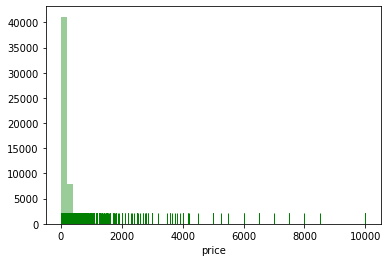

In [20]:
#plot the price distribution
sns.distplot(df.price, color = 'green', kde=False, rug=True);

Looks like we have lots of listing with price of zero, definitely need to filter them out

In [21]:
#drop all free listings
df.drop(df.index[df['price'] == 0], inplace = True)

In [22]:
df['price'].describe()

count    51085.000000
mean       160.278144
std        373.669684
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

It looks like 50% of the Airbnb listings in NYC are below 105 dollaers per night, this is quiet suprising. Since there is a huge gap betwwen 75th percentile and the max price, I decide to use the cut method to investigate the distribution of price more closely.

In [23]:
df['price_class'] = pd.cut(x=df['price'], bins=[df['price'].min(), 69, 105, 175, df['price'].max()],
                            labels=['Budget', 'Economy', 'Premium', 'Luxury'])

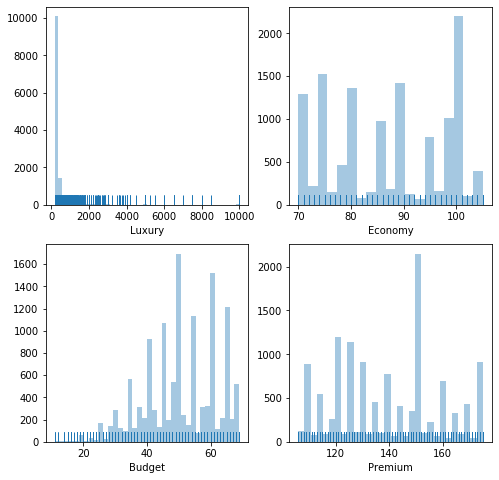

In [24]:
#plot the price histgrams based on the cut crated above
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
for cl, ax in zip(df.price_class.unique(), axes.flat):
    df_sub = df[df.price_class == cl]
    
    sns.distplot(df_sub.price, kde=False, rug=True, ax=ax);
    ax.set_xlabel(cl)

I decide to drop the following features because they are appearently not so useful in predicting the price

In [25]:
#drop 45 useless features
useless = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
len(useless)

45

In [26]:
df.drop(useless, axis=1, inplace=True)

For both the numerical and the categorical features, I decide to drop features that have less than 10% of total rows since they are basically empty.

In [27]:
#62 cols in total
cols = df.columns.tolist()

In [28]:
#decide minimum amount of data required for each numerical feature
row_num = df.shape[0]
min_amount = row_num*0.01
min_amount

510.85

In [29]:
#remove numerical features that are less than the minimum amount
rm_numeric = df.describe().loc['count', ] < min_amount
rm_numeric

host_total_listings_count                       False
latitude                                        False
longitude                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                        False
beds                                            False
square_feet                                      True
price                                           False
security_deposit                                False
cleaning_fee                                    False
guests_included                                 False
extra_people                                    False
minimum_nights                                  False
maximum_nights                                  False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights      

In [30]:
len(rm_numeric)

39

In [31]:
#remove the 'square_feet' feature since it is empty.
df = df.drop('square_feet', 1)

In [32]:
#remove all categorical features that are less than the minimum amount
rm_cate = df.describe(include=['O', 'Bool']).loc['count', ] < min_amount
rm_cate

street                              False
neighbourhood                       False
neighbourhood_cleansed              False
neighbourhood_group_cleansed        False
zipcode                             False
property_type                       False
room_type                           False
bed_type                            False
amenities                           False
calendar_updated                    False
has_availability                    False
calendar_last_scraped               False
first_review                        False
last_review                         False
requires_license                    False
license                              True
jurisdiction_names                   True
instant_bookable                    False
is_business_travel_ready            False
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
Name: count, dtype: bool

In [33]:
df.drop(['license','jurisdiction_names'], axis=1, inplace=True)

In [34]:
#Access missing values by column
percent_missing = df.isnull().sum() * 100 / len(df)

In [35]:
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
host_total_listings_count,host_total_listings_count,0.011745
street,street,0.000000
neighbourhood,neighbourhood,0.029363
neighbourhood_cleansed,neighbourhood_cleansed,0.000000
neighbourhood_group_cleansed,neighbourhood_group_cleansed,0.000000
zipcode,zipcode,0.908290
latitude,latitude,0.000000
longitude,longitude,0.000000
property_type,property_type,0.000000
room_type,room_type,0.000000


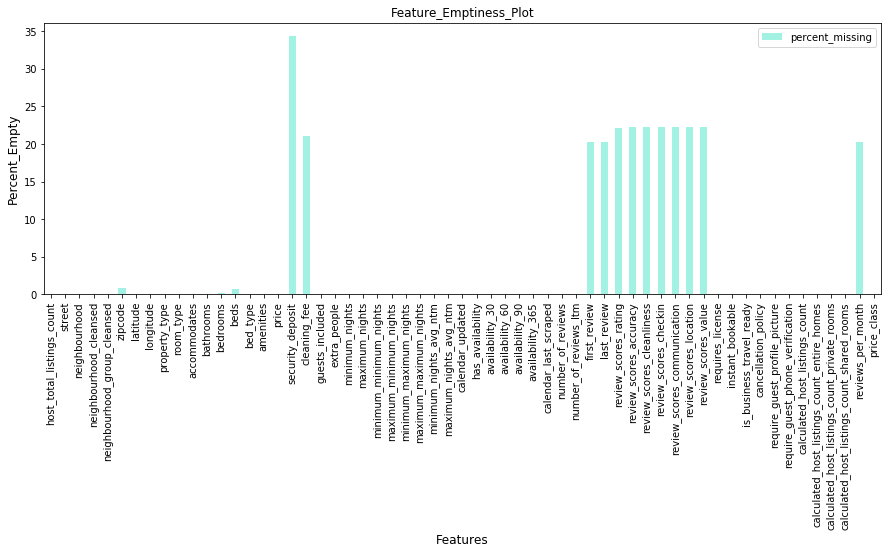

In [36]:
ax = missing_value_df.plot(kind = 'bar', color='#a2f2e4', figsize = (15, 5))
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Percent_Empty' ,fontsize=12)
ax.set_title('Feature_Emptiness_Plot',fontsize=12)
plt.show()

In [37]:
df.first_review

0        2009-11-21
1        2014-09-30
2        2009-04-20
3        2009-05-28
4        2009-05-06
            ...    
51092           NaN
51093           NaN
51094           NaN
51095           NaN
51096           NaN
Name: first_review, Length: 51085, dtype: object

I decide to drop 'first_review' and 'last_review' but keep all the review scores since'first_review' and 'last_review' are categorical features (dats), it is not that meaning to impute the missing values.

In [38]:
cols_drop = ['first_review','last_review']
df.drop(cols_drop, axis=1, inplace=True)

I decided to 0 for the null values in features 'secirity_deposit' and 'cleaning_fee'instead of the average value since the host may just do not charge those fees. As for other features with null values, they will be filled with SimpleImputer later in the pipeline.

In [39]:
#fill 0 for security deposit and cleaning fee
df['security_deposit'].fillna(0, inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)

In [40]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [41]:
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
host_total_listings_count,host_total_listings_count,0.011745
street,street,0.000000
neighbourhood,neighbourhood,0.029363
neighbourhood_cleansed,neighbourhood_cleansed,0.000000
neighbourhood_group_cleansed,neighbourhood_group_cleansed,0.000000
zipcode,zipcode,0.908290
latitude,latitude,0.000000
longitude,longitude,0.000000
property_type,property_type,0.000000
room_type,room_type,0.000000


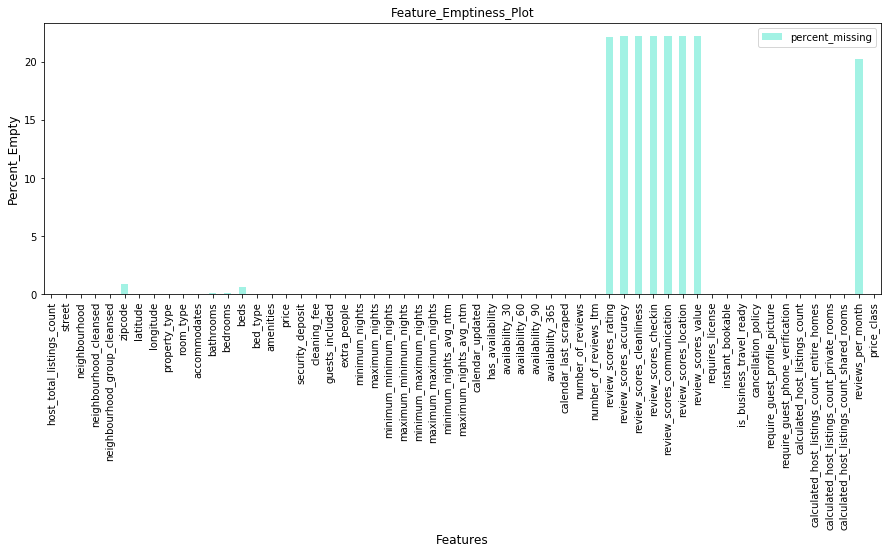

In [42]:
ax = missing_value_df.plot(kind = 'bar', color='#a2f2e4', figsize = (15, 5))
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Percent_Empty' ,fontsize=12)
ax.set_title('Feature_Emptiness_Plot',fontsize=12)
plt.show()

The features 'street', 'amenities', 'calendar_last_scraped' and 'calendar_updated' require advanced texting mining skills, since I do not have such skills yet, I decided to drop these features.

In [43]:
#drop some categorical features.
cate_useless = ['street', 'amenities', 'calendar_last_scraped', 'calendar_updated']
df.drop(cate_useless, axis=1, inplace=True)

I decide to foucs on zipcode and neighbourhood, since intuitively location is highly correlated with price

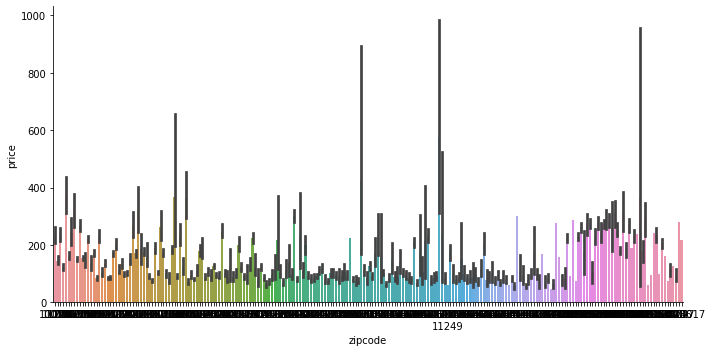

In [44]:
#plot price by zip_code
sns.catplot(x = "zipcode", y = "price", data = df, kind = "bar", height = 5, aspect = 2);

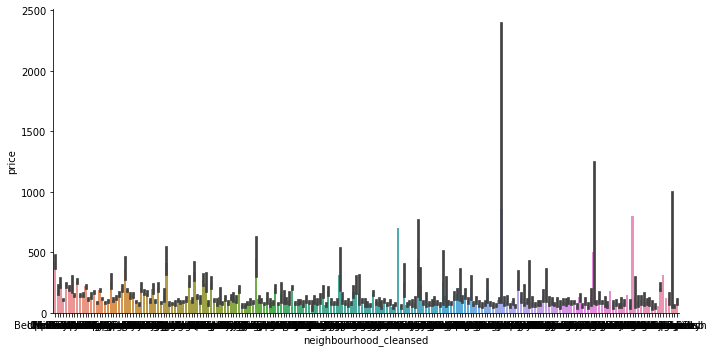

In [45]:
#plot price by neighbourhood
sns.catplot(x = "neighbourhood_cleansed", y = "price", data = df, kind = "bar", height = 5, aspect = 2);

In [46]:
# Focus on zip codes

from collections import Counter

# Get number of zipcodes
nb_counts = Counter(df.zipcode)
print("Number of Zipcodes:", len(nb_counts))

Number of Zipcodes: 227


In [47]:
#drop the null values
df = df.replace('nan', np.nan)
df.dropna(subset=['zipcode'],inplace=True)

It turns out that some zipcodes have letters in them, so I decide to remove the letters.

In [48]:
df['zipcode'] = df['zipcode'].str.strip()

In [49]:
df['zipcode'] = df['zipcode'].str.replace(r"[a-zA-Z]",'')

In [50]:
df['zipcode'] = df['zipcode'].astype(str)

In [51]:
df['zipcode'] = df['zipcode'].str[:5]

In [52]:
zip_list = df['zipcode'].unique().tolist()
zip_list

['10018',
 '11238',
 '10016',
 '11216',
 '10019',
 '10025',
 '10002',
 '10036',
 '11215',
 '10014',
 '11211',
 '11205',
 '10011',
 '10029',
 '11217',
 '10034',
 '10003',
 '10031',
 '10027',
 '11237',
 '11226',
 '10009',
 '10024',
 '11225',
 '11101',
 '11221',
 '11206',
 '11222',
 '10010',
 '11249',
 '10001',
 '10162',
 '11231',
 '10035',
 '10032',
 '11377',
 '11201',
 '11233',
 '10023',
 '10128',
 '11234',
 '11367',
 '10028',
 '10069',
 '11104',
 '10065',
 '10301',
 '10013',
 '10452',
 '10039',
 '11385',
 '10454',
 '10021',
 '10075',
 '11434',
 '11232',
 '11379',
 '10026',
 '11105',
 '10044',
 '10022',
 '11103',
 '10473',
 '10475',
 '10468',
 '11102',
 '10038',
 '11213',
 '10033',
 '11427',
 '11693',
 '10012',
 '11375',
 '10470',
 '10030',
 '11207',
 '10453',
 '11223',
 '10469',
 '11208',
 '11235',
 '11209',
 '11204',
 '10305',
 '11691',
 '11418',
 '10017',
 '11373',
 '11224',
 '11412',
 '10004',
 '11203',
 '11374',
 '10466',
 '10040',
 '11218',
 '11106',
 '10304',
 '11220',
 '11230',


Taking a look at number of listing by each zipcode, I may need to drop some zipcodes if they have too few listings because they will decrease the model performance.

In [53]:
num_listing_by_zip = df.groupby(['zipcode'])['host_total_listings_count'].sum()
num_listing_by_zip.sort_values(ascending=False)

zipcode
 1001    122388.0
 1000    114576.0
10036     80467.0
10016     79807.0
10038     68799.0
           ...   
11239         1.0
10550         1.0
10043         0.0
11243         0.0
11580         0.0
Name: host_total_listings_count, Length: 204, dtype: float64

I found out that there are some zipcode that are only four digits long, but it is impossible to guess which digit it is missing, I decide to leave these zipcode like that. In addition, I decided to drop zip codes with less than 100 listings since keeping them in the dataset will only decrease the model performance.

In [54]:
len(num_listing_by_zip.index)

204

In [55]:
num_listing_by_zip2 = num_listing_by_zip[num_listing_by_zip.values >= 100]
zip_to_keep = list(num_listing_by_zip2.index)
zip_to_keep

[' 1000',
 ' 1001',
 ' 1002',
 ' 1003',
 ' 1006',
 ' 1007',
 ' 1012',
 ' 1120',
 ' 1124',
 '10001',
 '10002',
 '10003',
 '10004',
 '10005',
 '10006',
 '10007',
 '10009',
 '10010',
 '10011',
 '10012',
 '10013',
 '10014',
 '10016',
 '10017',
 '10018',
 '10019',
 '10021',
 '10022',
 '10023',
 '10024',
 '10025',
 '10026',
 '10027',
 '10028',
 '10029',
 '10030',
 '10031',
 '10032',
 '10033',
 '10034',
 '10035',
 '10036',
 '10037',
 '10038',
 '10039',
 '10040',
 '10044',
 '10065',
 '10075',
 '10128',
 '10301',
 '10304',
 '10305',
 '10451',
 '10452',
 '10453',
 '10454',
 '10455',
 '10456',
 '10457',
 '10461',
 '10462',
 '10463',
 '10465',
 '10466',
 '10467',
 '10468',
 '10469',
 '10475',
 '11101',
 '11102',
 '11103',
 '11104',
 '11105',
 '11106',
 '11109',
 '11201',
 '11203',
 '11205',
 '11206',
 '11207',
 '11208',
 '11209',
 '11210',
 '11211',
 '11212',
 '11213',
 '11214',
 '11215',
 '11216',
 '11217',
 '11218',
 '11219',
 '11220',
 '11221',
 '11222',
 '11223',
 '11225',
 '11226',
 '11229',


In [56]:
#the number of zip codes to keep
len(zip_to_keep)

139

In [57]:
#bool indicator for zip code removal
df['zipcode'].isin(zip_to_keep)

0        True
1        True
2        True
3        True
4        True
         ... 
51092    True
51093    True
51094    True
51095    True
51096    True
Name: zipcode, Length: 50621, dtype: bool

Here df2 replaces df1, df2 is just df with some zipcodes(those with less than 100 listings) removed 

In [58]:
df2 = df[df['zipcode'].isin(zip_to_keep)]

In [59]:
df2.shape

(49457, 53)

Again, I will apply the same logic. I will drop neighbourhoods with less than 100 listings since keeping those neighourhoods will decrease the model performance since the average price in these neighboruhoods have a higher chance to be outlinears, which will decrease the model performance.

In [60]:
# Focus on neighbourhoods

from collections import Counter

# Get number of neighbourhoods
nb_counts = Counter(df2.neighbourhood_cleansed)
print("Number of neighbourhoods:", len(nb_counts))

Number of neighbourhoods: 177


In [61]:
#number of listing by neighbourhood
num_listing_by_nh = df2.groupby(['neighbourhood_cleansed'])['host_total_listings_count'].sum()
num_listing_by_nh.sort_values(ascending=False)

neighbourhood_cleansed
Financial District    222087.0
Midtown               132814.0
Hell's Kitchen        112819.0
Chelsea                95098.0
Murray Hill            72105.0
                        ...   
Rockaway Beach             1.0
Gerritsen Beach            1.0
College Point              1.0
Queens Village             1.0
West Brighton              0.0
Name: host_total_listings_count, Length: 177, dtype: float64

In [62]:
num_listing_by_nh2 = num_listing_by_nh[num_listing_by_nh.values >= 100]
nh_to_keep = list(num_listing_by_nh2.index)
nh_to_keep

['Allerton',
 'Arverne',
 'Astoria',
 'Battery Park City',
 'Bay Ridge',
 'Bedford-Stuyvesant',
 'Boerum Hill',
 'Borough Park',
 'Briarwood',
 'Brighton Beach',
 'Brooklyn Heights',
 'Brownsville',
 'Bushwick',
 'Canarsie',
 'Carroll Gardens',
 'Chelsea',
 'Chinatown',
 'Clinton Hill',
 'Cobble Hill',
 'Concourse',
 'Corona',
 'Crown Heights',
 'Cypress Hills',
 'Ditmars Steinway',
 'Downtown Brooklyn',
 'East Elmhurst',
 'East Flatbush',
 'East Harlem',
 'East New York',
 'East Village',
 'Eastchester',
 'Edgemere',
 'Elmhurst',
 'Far Rockaway',
 'Financial District',
 'Flatbush',
 'Flatiron District',
 'Flatlands',
 'Flushing',
 'Fordham',
 'Forest Hills',
 'Fort Greene',
 'Glendale',
 'Gowanus',
 'Gramercy',
 'Gravesend',
 'Greenpoint',
 'Greenwich Village',
 'Harlem',
 "Hell's Kitchen",
 'Inwood',
 'Jackson Heights',
 'Jamaica',
 'Kensington',
 'Kew Gardens',
 'Kingsbridge',
 'Kips Bay',
 'Little Italy',
 'Long Island City',
 'Longwood',
 'Lower East Side',
 'Maspeth',
 'Middle Vi

In [63]:
len(nh_to_keep)

103

df3 is just df2 with neighboohds that have less than 100 listings removed

In [64]:
df3 = df2[df2['neighbourhood_cleansed'].isin(nh_to_keep)]

In [65]:
df3

,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_class
0,6.0,Midtown,Midtown,Manhattan,10018,40.753620,-73.983770,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,225.0,350.0,95.0,1,0.0,7,1125,7,7,1125,1125,7.0,1125.0,t,30,60,90,365,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39,Luxury
1,1.0,Brooklyn,Clinton Hill,Brooklyn,11238,40.685140,-73.959760,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,89.0,500.0,0.0,1,0.0,1,730,1,1,730,730,1.0,730.0,t,7,8,14,137,307,70,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,f,f,moderate,f,f,1,1,0,0,4.69,Economy
2,1.0,Manhattan,Murray Hill,Manhattan,10016,40.747670,-73.975000,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,200.0,300.0,125.0,2,100.0,3,21,3,3,21,21,3.0,21.0,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,1,1,0,0,0.59,Luxury
3,1.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,11216,40.686880,-73.955960,Apartment,Private room,2,NaN,1.0,1.0,Futon,60.0,450.0,0.0,1,30.0,29,730,29,29,730,730,29.0,730.0,t,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.38,Budget
4,1.0,Manhattan,Hell's Kitchen,Manhattan,10019,40.764890,-73.984930,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,79.0,0.0,15.0,1,12.0,2,14,1,2,14,14,1.9,14.0,t,6,8,13,216,463,49,84.0,9.0,7.0,9.0,9.0,10.0,8.0,f,f,f,strict_14_with_grace_period,f,f,1,0,1,0,3.53,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51092,0.0,NaN,Flushing,Queens,11355,40.759670,-73.823370,Condominium,Entire home/apt,4,1.0,1.0,2.0,Real Bed,120.0,0.0,75.0,2,25.0,1,1125,1,1,1125,1125,1.0,1125.0,t,21,51,81,81,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,t,f,flexible,f,f,1,1,0,0,NaN,Premium
51093,1.0,Bushwick,Bushwick,Brooklyn,11207,40.689470,-73.907620,Apartment,Private room,3,1.0,1.0,NaN,Real Bed,60.0,0.0,25.0,1,10.0,2,1125,2,2,1125,1125,2.0,1125.0,t,10,10,11,11,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,1,0,1,0,NaN,Budget
51094,4.0,Williamsburg,Williamsburg,Brooklyn,11206,40.709250,-73.949130,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,144.0,0.0,0.0,1,0.0,3,1125,3,3,1125,1125,3.0,1125.0,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,4,4,0,0,NaN,Premium
51095,2.0,Brooklyn,Canarsie,Brooklyn,11236,40.629000,-73.898930,House,Private room,1,1.0,1.0,1.0,Real Bed,45.0,0.0,0.0,1,0.0,3,1125,3,3,1125,1125,3.0,1125.0,t,23,53,83,173,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,2,0,2,0,NaN,Budget


I decide to conduct multicollinearity evaluation by constructing a correlation matrix, so that I can drop some highly correlated variables in order to increase model performance.

In [66]:
import sklearn 

In [67]:
from sklearn import preprocessing

def encode_categorical(array):
       """Softmax activation function.
    
    Arguments
        x: array data
    Returns
        label coded array if the array is categorical otherwise return the original array
    """
    if array.dtype != np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# temporary dataframe
corr_data = df3.copy()
# drop null values
corr_data = corr_data.dropna(axis=0)

# encode categorical data
corr_data = corr_data.apply(encode_categorical)
corr_data

,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_class
0,6.0,79,63,2,20,40.75362,-73.98377,1,0,0,1.0,0.0,1.0,4,225.0,350.0,95.0,0,0.0,6,239,6,6,220,221,7.0,1125.0,0,30,60,90,365,47,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0,0,3,1,1,1,2,0,0,0.39,2
1,1.0,12,17,1,102,40.68514,-73.95976,15,0,2,1.0,1.0,4.0,4,89.0,500.0,0.0,0,0.0,0,201,0,0,186,186,1.0,730.0,0,7,8,14,137,304,70,90.0,9.0,9.0,10.0,9.0,10.0,9.0,0,0,0,1,0,0,0,1,0,0,4.69,1
2,1.0,73,67,2,18,40.74767,-73.97500,1,0,1,1.0,1.0,1.0,4,200.0,300.0,125.0,1,100.0,2,20,2,2,20,20,3.0,21.0,0,0,0,0,0,77,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0,0,1,1,1,0,1,0,0,0.59,2
4,1.0,73,49,2,21,40.76489,-73.98493,1,2,1,1.0,1.0,1.0,4,79.0,0.0,15.0,0,12.0,1,13,0,1,13,13,1.9,14.0,0,6,8,13,216,390,49,84.0,9.0,7.0,9.0,9.0,10.0,8.0,0,0,0,3,0,0,0,0,1,0,3.53,1
5,1.0,114,94,2,26,40.80178,-73.96723,1,2,0,1.0,1.0,1.0,4,79.0,0.0,0.0,0,0.0,1,13,1,1,13,13,2.0,14.0,0,0,0,0,0,117,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,1,0,0,1,0,0.93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50827,2.0,113,93,2,44,40.77060,-73.95395,1,2,1,1.0,1.0,1.0,4,120.0,0.0,30.0,0,15.0,0,29,0,0,220,221,1.0,1125.0,0,29,59,89,89,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,0,0,1,0,2,0,2.00,3
50849,0.0,73,60,2,6,40.71901,-73.99156,1,0,1,1.0,1.0,1.0,4,150.0,200.0,50.0,0,0.0,8,34,8,8,34,34,9.0,35.0,0,0,30,36,36,1,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,0,1,0,0,2.00,3
50882,0.0,113,93,2,43,40.76485,-73.96628,1,0,3,1.0,0.0,2.0,4,149.0,0.0,50.0,0,35.0,0,89,0,0,220,221,1.0,1125.0,0,3,3,3,3,0,1,100.0,10.0,4.0,10.0,10.0,10.0,8.0,0,1,0,0,0,0,0,1,0,0,1.00,3
50940,0.0,40,35,1,92,40.65377,-73.95363,1,2,1,1.0,1.0,1.0,4,62.0,0.0,30.0,0,0.0,0,20,0,0,220,221,1.0,1125.0,0,23,53,83,172,0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,3,0,0,3,1,3,0,1.00,0


In [68]:
# Compute matrix of correlation coefficients
corr_matrix = corr_data.corr(method='pearson')
corr_matrix

,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_class
host_total_listings_count,1.000000,0.043035,0.008962,0.049308,-0.098454,0.017637,-0.075770,0.027017,-0.070026,-0.005394,0.001024,-0.044332,-0.008352,0.011094,0.018829,0.034001,0.151876,-0.005876,-0.053138,0.185403,0.086194,0.189353,0.324194,0.020838,0.028885,0.500520,-0.000068,NaN,0.009525,0.034355,0.051875,0.112027,-0.051012,-0.046833,-0.015928,-0.020788,0.002630,-0.031670,-0.047960,0.000248,-0.060605,NaN,0.043156,NaN,0.038753,-0.010694,-0.013732,0.533488,0.558706,0.034810,0.005811,-0.047087,0.053117
neighbourhood,0.043035,1.000000,0.565330,0.467281,-0.327937,0.451759,-0.013736,-0.030494,-0.029294,-0.022178,-0.046074,-0.050751,-0.020006,-0.008592,0.053654,0.027489,0.046981,-0.042887,0.004497,0.056323,0.058715,0.054677,0.061868,0.045325,0.049592,0.041286,0.012712,NaN,0.026526,0.029558,0.031060,0.035195,-0.022285,-0.014839,-0.018239,-0.031719,-0.013227,-0.025877,-0.018235,0.106671,-0.038965,NaN,0.000960,NaN,0.034383,-0.000309,-0.006405,0.077537,0.081865,-0.004138,-0.007495,-0.003294,0.084248
neighbourhood_cleansed,0.008962,0.565330,1.000000,0.139267,-0.157651,0.272111,-0.128198,-0.042078,-0.059905,-0.025785,-0.036060,-0.027391,-0.032610,-0.004462,0.050367,0.039507,0.062643,-0.049905,-0.006158,0.064721,0.046241,0.065886,0.062893,0.035899,0.038812,0.031896,0.008808,NaN,-0.048259,-0.053997,-0.055488,-0.041429,-0.039889,-0.052701,0.014647,-0.002377,-0.004983,-0.004666,0.009010,0.145451,-0.009991,NaN,-0.047632,NaN,0.001382,-0.007048,-0.007498,0.024643,0.048371,-0.047782,-0.036886,-0.059634,0.105151
neighbourhood_group_cleansed,0.049308,0.467281,0.139267,1.000000,-0.281197,0.439605,0.204911,-0.000755,0.021055,-0.031668,-0.055041,-0.066301,-0.020516,-0.014294,0.028881,0.006508,-0.009207,-0.026229,0.009679,0.026284,0.042528,0.025237,0.032300,0.030606,0.034393,0.025602,0.010647,NaN,0.073004,0.083860,0.089671,0.084298,0.011609,0.039869,-0.032978,-0.039471,-0.004025,-0.031213,-0.032770,0.070382,-0.047877,NaN,0.041971,NaN,0.023217,-0.005762,-0.017986,0.097158,0.065589,0.066515,0.004912,0.064580,0.014784
zipcode,-0.098454,-0.327937,-0.157651,-0.281197,1.000000,-0.562092,0.600378,0.216277,0.139759,0.018963,0.049898,0.092699,0.040780,0.005997,-0.131041,-0.089024,-0.158707,0.054133,-0.011574,-0.098967,-0.090621,-0.091344,-0.112503,-0.056281,-0.062807,-0.086004,-0.027074,NaN,0.067135,0.074484,0.079847,0.031346,0.043826,0.063639,0.032974,0.041715,0.034497,0.051513,0.023889,-0.142332,0.077717,NaN,0.015454,NaN,-0.090363,-0.012574,-0.005464,-0.112579,-0.164089,0.104083,0.011032,0.069977,-0.277340
latitude,0.017637,0.451759,0.272111,0.439605,-0.562092,1.000000,-0.000258,-0.129553,0.019647,-0.051123,-0.063076,-0.079613,-0.051632,-0.017271,0.032660,0.017103,0.016921,-0.061917,0.005908,0.055888,0.044814,0.053593,0.053405,0.039083,0.041597,0.027147,0.011208,NaN,-0.008744,-0.010059,-0.012422,0.001387,-0.010396,-0.016801,-0.023266,-0.028338,-0.021857,-0.027088,-0.016640,0.050208,-0.037739,NaN,0.010510,NaN,0.040963,0.000619,-0.00117

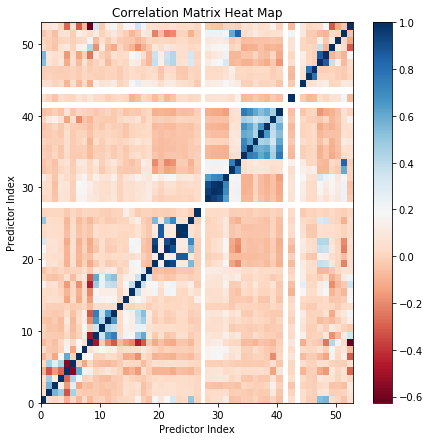

In [69]:
import matplotlib.pyplot as plt

# display the correlation heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Correlation Matrix Heat Map')
plt.colorbar()

plt.show()

In [70]:
corr_matrix.iloc[35:41,35:41]

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_accuracy,1.000000,0.610651,0.578906,0.611026,0.429047,0.694941
review_scores_cleanliness,0.610651,1.000000,0.446948,0.469636,0.343812,0.609172
review_scores_checkin,0.578906,0.446948,1.000000,0.660174,0.386936,0.530715
review_scores_communication,0.611026,0.469636,0.660174,1.000000,0.410269,0.580991
review_scores_location,0.429047,0.343812,0.386936,0.410269,1.000000,0.459848
review_scores_value,0.694941,0.609172,0.530715,0.580991,0.459848,1.000000


In [71]:
corr_matrix.iloc[27:31,27:31]

,has_availability,availability_30,availability_60,availability_90
has_availability,NaN,NaN,NaN,NaN
availability_30,NaN,1.000000,0.954572,0.906625
availability_60,NaN,0.954572,1.000000,0.979666
availability_90,NaN,0.906625,0.979666,1.000000


From the above correlation matrix we can see that the features 'has_availabilty', 'requires_license' and 'is_business_travel_ready' are all Nans, so they will be dropped. In addition, because features that begin with 'availability' such as 'availability_30' are are correlated with each other, I decided to keep the one that is the least correlated -- 'availability_365'.

In [72]:
features_drop = ['has_availability', 'requires_license', 'is_business_travel_ready','availability_30','availability_60','availability_90','neighbourhood']

In [73]:
df3.drop(features_drop, axis=1, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
df3.shape

(48384, 46)

I converted the categorical features into numerical features with the one-hot encoding method, so that they can be used for machine learning models.

In [75]:
#one hot encoding for categorical features
df_final = pd.get_dummies(df3)

Take a look at the final features

In [76]:
list(df_final.columns)

['host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'neighbourhood_cleansed_Allerton',
 'neighbourhood_cleansed_Arverne',
 'neighbourhood_cleansed_Astoria',
 'neighbourhood_cleansed_Battery Park

In [77]:
print(df_final.shape)

(48384, 344)


In [78]:
df_final.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_cleansed_Allerton,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Chelsea,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Cobble Hill,neighbourhood_cleansed_Concourse,neighbourhood_cleansed_Corona,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_Cypress Hills,neighbourhood_cleansed_Ditmars Steinway,neighbourhood_cleansed_Downtown Brooklyn,...,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,price_class_Budget,price_class_Economy,price_class_Premium,price_class_Luxury
count,48378.000000,48384.000000,48384.000000,48384.000000,48342.000000,48314.000000,48072.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,4.838400e+04,48384.000000,48384.000000,4.838400e+04,4.838400e+04,48384.000000,4.838400e+04,48384.000000,48384.000000,48384.000000,37646.000000,37616.000000,37629.000000,37604.000000,37619.000000,37599.000000,37600.000000,48384.000000,48384.000000,48384.000000,48384.000000,38577.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,...,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000,48384.000000

The following codes are the modeling part, I will use 4 models in this project.
1. Linear regression
2. Random Forest regression
3. Xgboost regression
4. MultiLayerPerception regression
All of the above models are built using sklearn modules except for the Xgboost regression, which is from the xhboost library.

In [79]:
#drop the target from dataset
y = df_final['price']
x = df_final.drop('price', axis = 1)

#train,test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [80]:
#create pipleline for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

lm_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler(),
                               LinearRegression())

#train the model
lm_pipeline.fit(train_x, train_y)

#prediction with linear regression pipeline
pred_y = lm_pipeline.predict(test_x)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [82]:
#linear regression model performance evaluation
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for baseline model is:
---------------------------------------------
mean absoulte error is 1193696324231.3396
R2 score is -8.966651000769826e+22


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

#create the random forest pipeline
rf_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler(),PolynomialFeatures(degree=1),
                               RandomForestRegressor(random_state = 10))

#train the model
rf_pipeline.fit(train_x, train_y)

#prediction with random forest pipeline
pred_y = rf_pipeline.predict(test_x)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('randomforestregress...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
             

In [85]:
#random forest model performance evaluation
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for baseline model is:
---------------------------------------------
mean absoulte error is 43.484107677999376
R2 score is 0.5699573213139757


In [86]:
#create the prarmeter grid for hyperparameter tuning
random_grid = {'randomforestregressor__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)],
               'randomforestregressor__max_features': ['auto', 'sqrt'],
               'randomforestregressor__max_depth': [int(x) for x in np.linspace(10, 100, num = 5)],
               'randomforestregressor__min_samples_split': [2, 5, 10],
               'randomforestregressor__min_samples_leaf': [3, 4, 5],
               'randomforestregressor__bootstrap': [True, False]}

In [87]:
#use random search to search for best hyperparameters

from sklearn.model_selection import RandomizedSearchCV

#random search of parameters with 2 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf_pipeline, param_distributions = random_grid, 
                               n_iter = 10, cv = 2, verbose=2,
                               random_state = 10, n_jobs = -1, 
                               scoring =  'neg_mean_squared_error')

In [88]:
#fit the grid search model
rf_random.fit(train_x, train_y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.5min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,
                                                            missing_values=nan,
                                                            strategy='mean',
                                                            verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('polynomialfeatures',
                          

In [89]:
#extract the best hyperparameters
rf_random.best_params_

{'randomforestregressor__n_estimators': 340,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_depth': 100,
 'randomforestregressor__bootstrap': True}

In [90]:
#fit the pipeline with best hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#create the tuned random forest model pipeline
rf_best = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler(),PolynomialFeatures(degree=1),
                               RandomForestRegressor(random_state = 10, bootstrap = True,
max_depth = 100,
max_features = 'auto',
min_samples_leaf = 3,
min_samples_split = 5,
n_estimators = 340))

# train the model
rf_best.fit(train_x, train_y)

#prediction with tuned random forest model
pred_y_randomsearch = rf_best.predict(test_x)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('randomforestregress...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=100,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
              

In [91]:
#model performance evaluation
mae_randomsearch = mean_absolute_error(test_y, pred_y_randomsearch)
r2_randomsearch=r2_score(test_y, pred_y_randomsearch)
print("The model performance for testing set from randomsearch search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_randomsearch))
print('R2 score is {}'.format(r2_randomsearch))
print('Improvement of {:0.2f}%.'.format( 100 * (r2_randomsearch- r2) / r2))

The model performance for testing set from randomsearch search
--------------------------------------
mean absoulte error is 43.01331838801924
R2 score is 0.60697868660858
Improvement of 6.50%.


In [162]:
import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#create the xgboost pipeline
xgb_pipeline = make_pipeline(SimpleImputer(), StandardScaler(), XGBRegressor(random_state = 10))

#train the model
xgb_pipeline.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                              colsample_bynode=1, colsample_bytree=1, gamma=0,
                              g...
                              interaction_constraints=None,
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random

In [163]:
#prediction with xgboost model
pred_y = xgb_pipeline.predict(test_x)

In [164]:
#xgboost model performance evaluation
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for baseline model is:
---------------------------------------------
mean absoulte error is 45.11662636302628
R2 score is 0.5833353524229822


In [0]:
#create the prarmeter grid for hyperparameter tuning
param_grid = {
        'xgbregressor__learning_rate': [0.05,0.07,0.1],
        'xgbregressor__max_depth': [5, 7, 9],
        'xgbregressor__min_child_weight': [4],
        'xgbregressor__subsample': [0.7],
        'xgbregressor__n_estimators': [100, 500, 900]}

In [0]:
#grid search of hyperparameters
from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator = xgb_pipeline,
            param_grid = param_grid, 
            cv = 3, n_jobs = -1, verbose = 2, 
            scoring = 'neg_median_absolute_error')

In [0]:
#fit the grid search model
xgb_grid.fit(train_x, train_y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 105.4min


In [0]:
#extract the best hyperparameters
xgb_grid.best_params_

NameError: ignored

In [165]:
#create the pipeline
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
xgb_best = make_pipeline(SimpleImputer(), StandardScaler(), XGBRegressor(random_state = 10,
 xgbregressor__learning_rate = 0.05,
 xgbregressor__max_depth =  9,
 xgbregressor__n_estimators = 100))

#train the model
xgb_best.fit(train_x, train_y)

#fit the model
pred_y_xgb_best = xgb_best.predict(test_x)

In [0]:
#model performance evaluation
mae_xgb_nest = mean_absolute_error(test_y, pred_y_xgb_best)
r2_xgb_best = r2_score(test_y,pred_y_xgb_best)
print("The model performance for testing set from randomsearch search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_xgb_nest))
print('R2 score is {}'.format(r2_xgb_best))
print('Improvement of {:0.2f}%.'.format( 100 * (r2_xgb_best- r2) / r2))

The model performance for testing set from randomsearch search
--------------------------------------
mean absoulte error is 53.118996798604115
R2 score is 0.5125775682276122
Improvement of 0.00%.


In [108]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#create the mlpregressor pipeline
nn_pipeline = make_pipeline(SimpleImputer(),Normalizer(norm='l2'), 
                               MLPRegressor(random_state = 10,
                                            max_iter = 400))
#train the model
nn_pipeline.fit(train_x, train_y)

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=400, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=10, shuffle=True, solver='adam',
                              tol=0.0001,

In [110]:
#fit the model
pred_y = nn_pipeline.predict(test_x)

In [112]:
#mlp regressor model performance evaluation
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for baseline model is:
---------------------------------------------
mean absoulte error is 81.87363771011277
R2 score is 0.13100779321315636


In [142]:
#create the parameter grid for grid search
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,100)],
    'mlpregressor__activation': ['logistic', 'tanh'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__learning_rate_init': [0.001, 0.0001],
}

In [120]:
param_grid2 = {
    'mlpregressor__activation': ['logistic', 'tanh'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__hidden_layer_sizes': [(100,), (100, 50), (100, 100), (100, 100, 100)],
    'mlpregressor__learning_rate_init': [0.001, 0.0001],
}

In [143]:
#grid search of hyperparameters
from sklearn.model_selection import GridSearchCV
nn_grid = GridSearchCV(estimator = nn_pipeline,
            param_grid = param_grid, 
            cv = 3, n_jobs = -1, verbose = 2, 
            scoring = 'neg_median_absolute_error')

In [144]:
# apply the grid search to model
test_x.fillna(train_x.mean(), inplace=True)
nn_grid.fit(train_x, train_y)

D:\anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 23.5min finished
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('normalizer',
                                        Normalizer(copy=True, norm='l2')),
                                       ('mlpregressor',
                                        MLPRegressor(activation='relu',
                                                     alpha=0.0001,
                                                     batch_size='auto',
                                           

In [145]:
#extract the best hyperparameters
nn_grid.best_params_

{'mlpregressor__activation': 'tanh',
 'mlpregressor__early_stopping': False,
 'mlpregressor__hidden_layer_sizes': (100, 100, 100),
 'mlpregressor__learning_rate_init': 0.0001,
 'mlpregressor__solver': 'adam'}

In [146]:
#fit the model with best hyperparameters
nn_best = make_pipeline(SimpleImputer(),Normalizer(norm='l2'), 
                               MLPRegressor(random_state = 10,
                                            max_iter = 400,activation= 'tanh',early_stopping= False,hidden_layer_sizes=(100, 100, 100),
                                            learning_rate_init=0.0001,solver= 'adam'))
#train the model
nn_best.fit(train_x, train_y)

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('mlpregressor',
                 MLPRegressor(activation='tanh', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100, 100, 100),
                              learning_rate='constant',
                              learning_rate_init=0.0001, max_fun=15000,
                              max_iter=400, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=10, shuffle=True, solver='adam',
                              t

In [147]:
#fit the model
pred_y_nn_best = nn_best.predict(test_x)

In [148]:
#model performance evaluation
mae_nn_nest = mean_absolute_error(test_y, pred_y_nn_best)
r2_nn_best = r2_score(test_y,pred_y_nn_best)
print("The model performance for testing set from randomsearch search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_nn_nest))
print('R2 score is {}'.format(r2_nn_best))
print('Improvement of {:0.2f}%.'.format( 100 * (r2_nn_best- r2) / r2))

The model performance for testing set from randomsearch search
--------------------------------------
mean absoulte error is 58.83880950345598
R2 score is 0.1268278496977896
Improvement of -3.19%.


In conclusion, the tuned random forest model has the lowest mean absoulte error at 43.01 and a R2 score of 0.61.
The xgboost and the mlp regression models do not perform as well, and the linear regression performs the worst.